In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
cor = sns.color_palette()

In [33]:
df = pd.read_html("https://www.espn.com.br/futebol/estatisticas/_/liga/BRA.1/vista/gols")
df = df[0]
print(df)

     POS                Nome                 Hora   P   G
0    1.0           Alerrando              Vitória  33  14
1    NaN        Yuri Alberto          Corinthians  28  14
2    3.0             Estêvão            Palmeiras  30  13
3    4.0              Wesley        Internacional  33  11
4    NaN       Raphael Veiga            Palmeiras  33  11
5    NaN             Luciano            São Paulo  31  11
6    NaN               Pedro             Flamengo  21  11
7    8.0       Rodrigo Garro          Corinthians  35  10
8    NaN       Pablo Vegetti        Vasco da Gama  34  10
9    NaN          José López            Palmeiras  34  10
10   NaN         Lucas Moura            São Paulo  28  10
11   NaN                Hulk          Atlético-MG  23  10
12  13.0        Rafael Borré        Internacional  22   9
13  14.0            Everaldo                Bahia  36   8
14   NaN     Matheus Pereira             Cruzeiro  33   8
15   NaN     Yannick Bolasie             Criciúma  33   8
16   NaN      

In [35]:
df.dropna(axis=0)
df.dropna(axis=1)

,Nome,Hora,P,G
0,Alerrando,Vitória,33,14
1,Yuri Alberto,Corinthians,28,14
2,Estêvão,Palmeiras,30,13
3,Wesley,Internacional,33,11
4,Raphael Veiga,Palmeiras,33,11
5,Luciano,São Paulo,31,11
6,Pedro,Flamengo,21,11
7,Rodrigo Garro,Corinthians,35,10
8,Pablo Vegetti,Vasco da Gama,34,10
9,José López,Palmeiras,34,10


In [37]:
# 5 Principais artilheiros
df_top5 = df[["Nome", "G"]].head(5)
display(df_top5)

,Nome,G
0,Alerrando,14
1,Yuri Alberto,14
2,Estêvão,13
3,Wesley,11
4,Raphael Veiga,11


In [39]:
# Yuri Alberto na serie A
tabela = pd.read_html("https://www.espn.com.br/futebol/jogador/estatisticas/_/id/266666/yuri-alberto")
df = tabela[1]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

   TIT  FC  FS  CA  CV   G  A  TC  CG  I
0   24  33  40   6   1  14  5  76  34  3
1   32  65  71   6   0   8  3  86  28  2
2   15  24  33   3   1   8  1  49  19  6


Na tabela que vimos a cima que o Yuri Alberto teve 140% de gols marcados do que anos anteriores 2022 = 8 Gols 2023 = 8 Gols 2024 = 14 Gols(Faltando 1 jogo para terminar o campeonato)

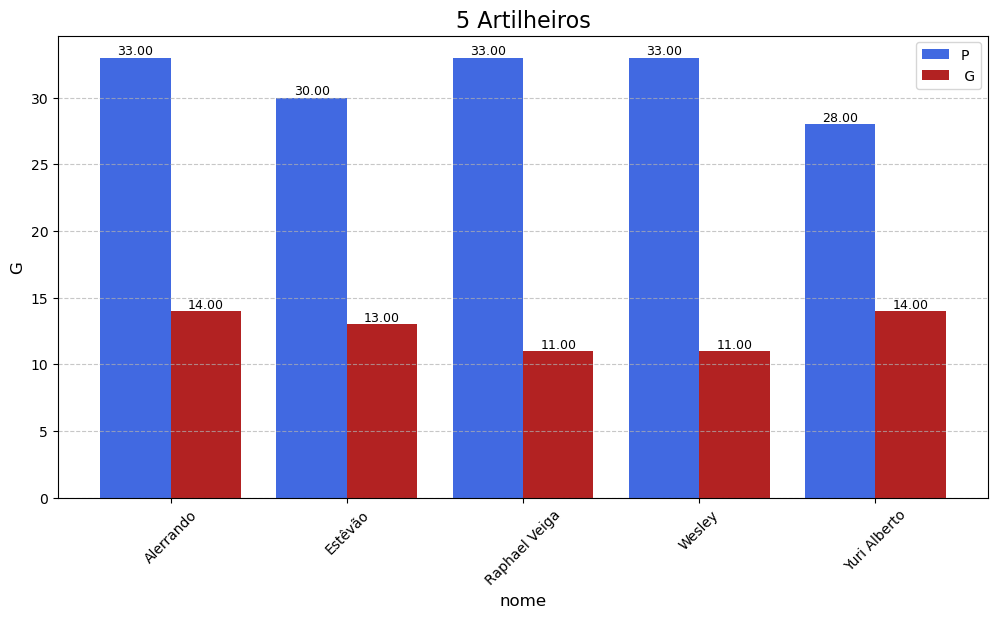

In [42]:
# Gráfico dos 5 artilheiros
data = {
    'Nome': ['Alerrando', 'Yuri Alberto', 'Estêvão', 'Wesley', 'Raphael Veiga'],
    'G': ['14', '14', '13', '11', '11'],
    'P': ['33', '28', '30', '33', '33']
}

df_artilheiros = pd.DataFrame(data)

df_artilheiros['P'] = pd.to_numeric(df_artilheiros['P'], errors='coerce')
df_artilheiros['G'] = pd.to_numeric(df_artilheiros['G'], errors='coerce')

Partidas_e_Gols = df_artilheiros.groupby('Nome')[['G', 'P']].mean()
Nome_e_Gols = df_artilheiros.groupby('Nome')['G'].mean()

x = range(len(Partidas_e_Gols))
largura= 0.4

plt.figure(figsize=(12, 6))
plt.bar([pos - largura / 2 for pos in x], Partidas_e_Gols['P'], width=largura,color='royalblue', label='P')
plt.bar([pos + largura / 2 for pos in x], Nome_e_Gols.values, width=largura,color='firebrick', label=' G')

for i, valor in enumerate(Partidas_e_Gols['P']):
  plt.text(i - largura / 2, valor, f"{valor:.2f}", ha='center', va='bottom', fontsize=9)

for i, valor in enumerate(Nome_e_Gols):
    plt.text(i + largura / 2, valor, f"{valor:.2f}", ha='center', va='bottom', fontsize=9)

plt.title('5 Artilheiros', fontsize=16)
plt.xlabel('nome', fontsize=12)
plt.ylabel('G', fontsize=12)
plt.xticks(x, Partidas_e_Gols.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusão

Yuri Alberto apresenta um desempenho notável, com taxa de conversão de 50%, apesar de jogar 5 partidas a menos que Alerrando, Raphael Veiga e Wesley, e 2 partidas a menos que Estêvão.

Se eu fosse técnico de um time, meu time dos sonhos seria uma equipe equilibrada, com jogadores talentosos e complementares. Considerando os jogadores mencionados anteriormente (Yuri Alberto, Alerrando, Raphael Veiga, Wesley e Estêvão), aqui estão minhas escolhas:

Yuri Alberto (Ataque): Sua habilidade técnica e capacidade de finalização seriam fundamentais.

Raphael Veiga (Meia-atacante): Sua criatividade e visão de jogo seriam fundamentais

In [45]:
# Times com Mais cartões em 2024

df_cartoes = pd.read_html("https://www.espn.com.br/futebol/estatisticas/_/liga/BRA.1/vista/cartoes")
df_cartoes = df_cartoes[0]
df_cartoes = df_cartoes.dropna(axis=0)
df_cartoes = df_cartoes.dropna(axis=1)
display(df_cartoes)

,POS,Hora,P,CA,CV,PTS
0,1.0,Atlético-GO,37,107,13,146
1,2.0,Atlético-MG,37,99,12,135
2,3.0,Fortaleza,37,102,10,132
3,4.0,Juventude,37,101,10,131
4,5.0,Fluminense,37,108,7,129
5,6.0,Corinthians,37,108,6,126
6,7.0,Vitória,37,105,6,123
7,8.0,Criciúma,37,98,7,119
8,9.0,Red Bull Bragantino,37,103,4,115
9,10.0,Cuiabá,37,108,1,111


Time que mais levou Cartão.
O Atlético-GO recebeu:

- 2,82 cartões amarelos por jogo (89,2% do total)
- 0,34 cartões vermelhos por jogo (10,8% do total)
- 3,16 cartões por jogo no total

Time que menos tomou cartão
Bahia:
- Cartões amarelos: 80
- Cartões vermelhos: 1
- Total de cartões: 81
- Média de cartões por jogo: 2,13 (81/38)
- Porcentagem de cartões amarelos: 98,8% (80/81)
- Porcentagem de cartões vermelhos: 1,2% (1/81)

In [48]:
df_cartoes_top5 = df_cartoes[["Hora", "P", "CA", "CV"]].head(5)
display(df_cartoes_top5)

,Hora,P,CA,CV
0,Atlético-GO,37,107,13
1,Atlético-MG,37,99,12
2,Fortaleza,37,102,10
3,Juventude,37,101,10
4,Fluminense,37,108,7


Aqui estão os 5 times com mais cartões no Campeonato Brasileiro:

Classificação

1. Atlético-GO: 120 cartões (107 amarelos, 13 vermelhos)
2. Fortaleza: 112 cartões (102 amarelos, 10 vermelhos)
3. Juventude: 111 cartões (101 amarelos, 10 vermelhos)
4. Atlético-MG: 111 cartões (99 amarelos, 12 vermelhos)
5. Fluminense: 112 cartões (105 amarelos, 7 vermelhos)

Estatísticas

- Jogos: 37 (exceto Fluminense com 36)
- Média de cartões por jogo: 3-4 por time.

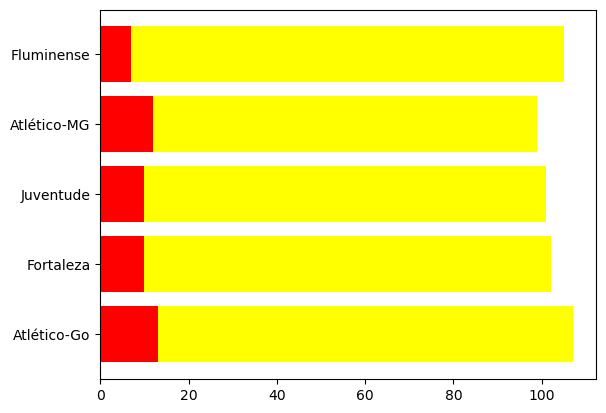

In [51]:
# Gráfico de Cartões

data = {
    'Time': ['Atlético-Go', 'Fortaleza', 'Juventude','Atlético-MG', 'Fluminense'],
    'Cartões_Amarelos': ['107', '102', '101', '99', '105'],
    'Cartões_Vermelhos': ['13', '10', '10', '12', '7']
}
group_Time = list(data['Time'])
group_Cartões_Amarelos = list(data['Cartões_Amarelos'])
group_Cartões_Vermelhos = list(data['Cartões_Vermelhos'])

group_Cartões_Amarelos = [int(x) for x in group_Cartões_Amarelos]
group_Cartões_Vermelhos = [int(x) for x in group_Cartões_Vermelhos]

fig, ax = plt.subplots()
ax.barh(group_Time, group_Cartões_Amarelos, color='yellow', label='Cartões Amarelos')
ax.barh(group_Time, group_Cartões_Vermelhos, color='red', label='Cartões Vermelhos')
plt.show()

Conclusão do meu projeto:

Aqui está uma conclusão e as ferramentas utilizadas:


A análise dos dados do Campeonato Brasileiro 2024 revelou:

1. Yuri Alberto como um dos principais artilheiros.
2. Atlético-GO como o time mais faltoso.
3. Importância da disciplina para o sucesso das equipes.
4. Fluminense com mais cartões amarelos.

Ferramentas Utilizadas

1. Python: Linguagem de programação para manipulação de dados.
2. Pandas: Biblioteca para criação e manipulação de DataFrames.
3. Matplotlib: Biblioteca para criação de gráficos.
4. Seaborn: Biblioteca para visualização de dados.
5. Plotly: Biblioteca para criação de gráficos interativos.
6. ESPN: Fonte de dados para estatísticas do Campeonato Brasileiro.

Habilidades Desenvolvidas

1. Análise de dados.
2. Visualização de dados.
3. Manipulação de DataFrames.
4. Criação de gráficos.
5. Interpretação de estatísticas esportivas.

Aqui está uma explicação detalhada do gráfico:

Gráfico de Barras Horizontais: Cartões por Time

Descrição

O gráfico apresenta a quantidade de cartões amarelos e vermelhos recebidos por cinco times de futebol.

Eixos

1. Eixo Y (Vertical): Lista os nomes dos times.
2. Eixo X (Horizontal): Representa a quantidade de cartões.

Cores

1. Amarelo: Cartões amarelos.
2. Vermelho: Cartões vermelhos.

Análise

1. Atlético-GO: Maior quantidade de cartões amarelos (107) e vermelhos (13).
2. Fluminense: Maior quantidade de cartões amarelos entre os cinco times, com 105.
3. Fortaleza e Juventude: Empatados em cartões vermelhos, com 10.
4. Atlético-MG: Menor quantidade de cartões amarelos, com 99.

Conclusões

1. O Atlético-GO foi o time mais faltoso.
2. O Fluminense recebeu mais cartões amarelos.
3. A disciplina é crucial para o sucesso das equipes.

Uso prático

Esse gráfico ajuda treinadores, jornalistas e torcedores a:

1. Analisar a disciplina das equipes.
2. Identificar padrões de comportamento.
3. Desenvolver estratégias para melhorar o desempenho.